## Entropy rate using a neural language model

The libraries we are going to use:

In [280]:
import torch         #For Neural Networks
import torch.nn as nn  #For Neural Networks
import numpy as np     
from nltk import ngrams   #Extracting ngrams from any string
import os #Reading file directories and other options
from tqdm import tqdm #Progress bar
import csv  #for writing output in csv

We define functions that we are going to need later:

In [281]:
#Function to obtain character ngrams from a text:
def get_char_ngrams(text, n):
  ngrams_list=[]
 
  for ngram in ngrams(text, n):
      ngram_string="".join(ngram) 
      ngrams_list.append(ngram_string)
  return(ngrams_list)  #Returns a list of the char ngrams contained in the input text

#Function to convert the input text (already converted to char ngrams) to index numbers:
def text2number(char_ngrams):
  index=0
  indexed_line=[]
  vocabulary={}
  for t in char_ngrams: #for each ngram in the list
    if not(t in vocabulary): #If we didn't indexed it already
      vocabulary[t]=index
      #print(w, index)
      index=index+1
         
    indexed_line.append(vocabulary[t])

  return (vocabulary, indexed_line)  #Returns a dictionary of the index values, and the text (already converted to char ngrams) converted to numeric indexes 

**Toy example**
First let see how to preprocess the text in order to prepare the input for the neural network.

1. First we get char trigrams:

In [ ]:
toycorpus = ' E v e r y o n e h a s t h e r i g h t t o e d u c a t i o n . E d u c a t i o n s h a l l b e f r e e , a t l e a s t i n t h e e l e m e n t a r y a n d f u n d a m e n t a l s t a g e s . E l e m e n t a r y e d u c a t i o n s h a l l b e c o m p u l s o r y . T e c h n i c a l a n d p r o f e s s i o n a l e d u c a t i o n s h a l l b e m a d e g e n e r a l l y a v a i l a b l e a n d h i g h e r e d u c a t i o n s h a l l b e e q u a l l y a c c e s s i b l e t o a l l o n t h e b a s i s o f m e r i t . 2 . E d u c a t i o n s h a l l b e d i r e c t e d t o t h e f u l l d e v e l o p m e n t o f t h e h u m a n p e r s o n a l i t y a n d t o t h e s t r e n g t h e n i n g o f r e s p e c t f o r h u m a n r i g h t s a n d f u n d a m e n t a l f r e e d o m s . I t s h a l l p r o m o t e u n d e r s t a n d i n g , t o l e r a n c e a n d f r i e n d s h i p a m o n g a l l n a t i o n s , r a c i a l o r r e l i g i o u s g r o u p s , a n d s h a l l f u r t h e r t h e a c t i v i t i e s o f t h e U n i t e d N a t i o n s f o r t h e m a i n t e n a n c e o f p e a c e . 3 . P a r e n t s h a v e a p r i o r r i g h t t o c h o o s e t h e k i n d o f e d u c a t i o n t h a t s h a l l b e g i v e n t o t h e i r c h i l d r e n . A r t i c l e 2 7 1 . E v e r y o n e h a s t h e r i g h t f r e e l y t o p a r t i c i p a t e i n t h e c u l t u r a l l i f e o f t h e c o m m u n i t y , t o e n j o y t h e a r t s a n d t o s h a r e i n s c i e n t i f i c a d v a n c e m e n t a n d i t s b e n e f i t s . 2 . E v e r y o n e h a s t h e r i g h t t o t h e p r o t e c t i o n o f t h e m o r a l a n d m a t e r i a l i n t e r e s t s r e s u l t i n g f r o m a n y s c i e n t i f i c , l i t e r a r y o r a r t i s t i c p r o d u c t i o n o f w h i c h h e i s t h e a u t h o r . A r t i c l e 2 8 E v e r y o n e i s e n t i t l e d t o a s o c i a l a n d i n t e r n a t i o n a l o r d e r i n w h i c h t h e r i g h t s a n d f r e e d o m s s e t f o r t h i n t h i s D e c l a r a t i o n c a n b e f u l l y r e a l i z e d . A r t i c l e 2 9 1 . E v e r y o n e h a s d u t i e s t o t h e c o m m u n i t y i n w h i c h a l o n e t h e f r e e a n d f u l l d e v e l o p m e n t o f h i s p e r s o n a l i t y i s p o s s i b l e . 2 . I n t h e e x e r c i s e o f h i s r i g h t s a n d f r e e d o m s , e v e r y o n e s h a l l b e s u b j e c t o n l y t o s u c h l i m i t a t i o n s a s a r e d e t e r m i n e d b y l a w s o l e l y f o r t h e p u r p o s e o f s e c u r i n g d u e r e c o g n i t i o n a n d r e s p e c t f o r t h e r i g h t s a n d f r e e d o m s o f o t h e r s a n d o f m e e t i n g t h e j u s t r e q u i r e m e n t s o f m o r a l i t y , p u b l i c o r d e r a n d t h e g e n e r a l w e l f a r e i n a d e m o c r a t i c s o c i e t y . 3 . T h e s e r i g h t s a n d f r e e d o m s m a y i n n o c a s e b e e x e r c i s e d c o n t r a r y t o t h e p u r p o s e s a n d p r i n c i p l e s o f t h e U n i t e d N a t i o n s . A r t i c l e 3 0 N o t h i n g i n t h i s D e c l a r a t i o n m a y b e i n t e r p r e t e d a s i m p l y i n g f o r a n y S t a t e , g r o u p o r p e r s o n a n y r i g h t n g a g e i n a n y a c t i v i t y o r t o p e r f o r m a n y a c t a i m e d a t t h e d e s t r u c t i o n o f a n y o f t h e r i g h t s a n d f r e e d o m s s e t f o r t h h e r e i n'
text=toycorpus.lower().replace(" ", "")  #We lowercase and remove spaces
char_trigrams=get_char_ngrams(text,3)   #We obtain trigrams of characters
print(char_trigrams)

2. We represent the text (already converted to trigrams) as numeric indexes. This way the neural network will be able to process it.

In [ ]:
out=text2number(char_trigrams) #it returns 2 objects, the dictionary with indexes, and the converted text
idx=out[0]  #the dictionary with indexes
indexed_corpus=out[1] #the converted text
print(idx)
print(indexed_corpus)

3. Once we have lists of numeric indexes representing the char ngrams in words, we'll just format them as training pairs (x,y) for the neural network. 

These training pairs are used by the neural network to model p(wj|wi), i.e., the probability of a char trigram given another char trigram in that language. 

In [ ]:
training_bigrams = list(ngrams(indexed_corpus, 2))  #We extract bigrams of char trigrams to form training pairs: (x,y)
print("Training_bigrams per word:")
print(training_bigrams)

print("We make two lists, one with all x values, another one with Y values. These will enter to the NN:")
print(list(zip(*training_bigrams)))

**4. Training the Neural Network**

In [ ]:
#We split the training pairs in two different lists (x and y), and we convert them to tensor data format. This is required by Pytorch:
x,y = torch.tensor(list(zip(*training_bigrams)), dtype=torch.long)
print(x,y)

We are training a feed forward NN. This is a basic Language Model similar to [Bengio](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimodrloY_2AhVJg_0HHRR3CjQQFnoECAQQAQ&url=https%3A%2F%2Fwww.jmlr.org%2Fpapers%2Fvolume3%2Fbengio03a%2Fbengio03a.pdf&usg=AOvVaw2dCMUIX1hAAcN67hkNtSQ0) (2003) 

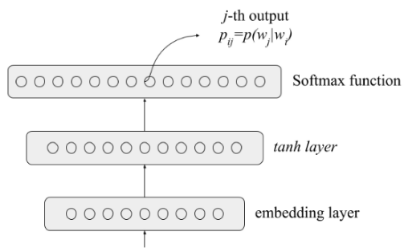

In [286]:
#Neural Netowrk Parameters
dim_in = len(idx)  #The dimension of the input layer (the size of the vocabulary)
dim = 300     #The dimension of the embedding layer
dim_h = 100  #The dimension of the hidden layer
dim_out = len(idx)  #The dimension of the output layer (the size of the vocabulary)

#We define the architecture of the Neural Network (feed forward) layer by layer:
#The final layer (output) is a softmax from which we will retrieve the probabilities we are looking for (once is trained):
forward = nn.Sequential(nn.Embedding(dim_in,dim), nn.Linear(dim,dim_h), nn.Tanh(), nn.Linear(dim_h,dim_out), nn.Softmax(1))

#We can see the process as  matrices multiplication:

#|V|x300  300x200  200x|V|


#We define a loss function for the training:
criterion = torch.nn.CrossEntropyLoss()

#Choosing the optimization algorithm (Stochastic gradient descent) and the learning rate
optimizer = torch.optim.SGD(forward.parameters(), lr=0.1)

#Number of iterations
its = 11

#We train the model
for epoch in tqdm(range(its)):
  for x,y in training_bigrams:
      #FORWARD
    x_in=torch.tensor([x], dtype=torch.long)
    y_pred = forward(x_in)

     #BACKWARD
    #Error calculation
    y_targ=torch.tensor([y], dtype=torch.long)
    loss = criterion(target=y_targ, input=y_pred)
    #zero grad
    optimizer.zero_grad()
    #Backprop
    loss.backward()
    #We update the values
    optimizer.step()

100%|██████████| 11/11 [00:20<00:00,  1.83s/it]


Once is trained we extract the values from the output layer and we construct our stochastic matrix:
- For each element of the vocabulary we will have one vector with probabilities that represent p(wj|wi)

For instance, let see the vector of probabilities associated to some trigram of our vocabulary:

*Extra: Try with other trigrams. How do the probabilities distributions look like?

In [ ]:
id=idx['the']
forward(torch.tensor([id])).detach()  #detach() removes some of the default format of Pytorch that we don't need anymore

The sum of the values of each vector should always be 1 (it's a probability distribution):

In [ ]:
probs=forward(torch.tensor([id])).detach()
probs.sum(1) # 1 indicates the axis of the tensor in which we are adding the values

Now let's see which are the most probable tokens given certain char trigram:

In [ ]:
id=idx['the']
probs=forward(torch.tensor([id])).detach()[0]  #detach() and [0] removes some of the default format of Pytorch that we don't need anymore

pairs={}
for ngram in idx.keys():  #for each char trigram in the vocabulary
  
  pairs[ngram]=float(probs[idx[ngram]])  #Store in a dictionary (ngram, probability)

[(k, v) for k, v in sorted(pairs.items(), key=lambda x: x[1], reverse=True)]  #print the sorted list 


We can construct a stochastic matrix with all these vectors, an calculate the entropy rate of the corpus:

In [ ]:
total_index_vocabulary = torch.tensor(list(idx.values()))  #The indexes of all elememnts in the vocabulary
stochastic_matrix = forward(total_index_vocabulary).detach()  #The stochastic matrix will contain all the vectors

mu = (1/len(idx))*stochastic_matrix.sum(1)
entropy_rate = -(mu*(stochastic_matrix*np.log2(stochastic_matrix)).sum(1)).sum(0)
 
print('Entropy rate:', entropy_rate)

##Training on all the corpus files

In [ ]:
directory="/content/processed/" #Data source (change it to your Data location)
all_files=[f for f in os.listdir(directory) if not f.startswith('.')] #listing all files in a directory (hidden files excluded)

f = open('/content/entropyRate(trigrams).csv', 'w') #Output CSV (change it to your Data location)
writer = csv.writer(f)  # create the csv writer
csvheader = ['filename', 'Hrate.trigrams']  #The header of your file
writer.writerow(csvheader)
size_char_ngrams=3

################################################################################

for n in all_files:
  print('Corpus:', n)
  inputcorpus=directory+n
  file=open(inputcorpus,'r', encoding="utf-8")
  text=file.read().lower().replace(" ", "")  #We lowercase and remove spaces
  char_ngrams=get_char_ngrams(text,size_char_ngrams)

  out=text2number(char_ngrams) #it returns 2 objects, the dictionary with indexes, and the converted text
  idx=out[0]  #the dictionary with indexes
  indexed_corpus=out[1] #the converted text

  training_bigrams = list(ngrams(indexed_corpus, 2))

  
  x,y = torch.tensor(list(zip(*training_bigrams)), dtype=torch.long)

  #Neural Network Specifications
  dim_in = len(idx)  #The dimension of the input layer (the size of the vocabulary)
  dim = 300     #The dimension of the embedding layer
  dim_h = 100  #The dimension of the hidden layer
  dim_out = len(idx)  #The dimension of the output layer (the size of the vocabulary)

  #We define the architecture of the Neural Network (feed forward) layer by layer:
  #The final layer (output) is a softmax from which we will retrieve the probabilities we are looking for (once is trained):
  forward = nn.Sequential(nn.Embedding(dim_in,dim), nn.Linear(dim,dim_h), nn.Tanh(), nn.Linear(dim_h,dim_out), nn.Softmax(1)) 


  #We define a loss function for the training:
  criterion = torch.nn.CrossEntropyLoss()

  #Choosing the optimization algorithm (Stochastic gradient descent) and the learning rate
  optimizer = torch.optim.SGD(forward.parameters(), lr=0.1)

  #Number of iterations
  its = 35

  #We train the model
  for epoch in tqdm(range(its)):
    for x,y in training_bigrams:
        #FORWARD
      x_in=torch.tensor([x], dtype=torch.long)
      y_pred = forward(x_in)

      #BACKWARD
      #Error calculation
      y_targ=torch.tensor([y], dtype=torch.long)
      loss = criterion(target=y_targ, input=y_pred)
      #zero grad
      optimizer.zero_grad()
      #Backprop
      loss.backward()
      #We update the values
      optimizer.step()

#Calculation of entropy rate:
  total_index_vocabulary = torch.tensor(list(idx.values()))  #The indexes of all elememnts in the vocabulary
  stochastic_matrix = forward(total_index_vocabulary).detach()  #The stochastic matrix will contain all the vectors

  mu = (1/len(idx))*stochastic_matrix.sum(1)
  entropy_rate = -(mu*(stochastic_matrix*np.log2(stochastic_matrix)).sum(1)).sum(0)

  
  print('Entropy rate:', float(entropy_rate))

  csvrow = [n, float(entropy_rate)]
  writer.writerow(csvrow)
 
  
f.close() # close the CSV file